<AxesSubplot:xlabel='wt', ylabel='mpg'>

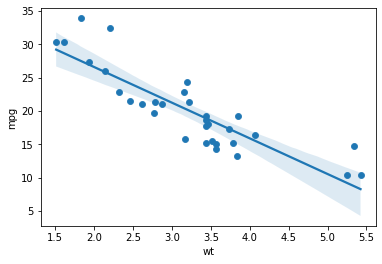

In [13]:
#%% packages
import numpy as np
import pandas as pd
import torch
import torch.nn as nn 
import seaborn as sns

#%% data import
cars_file = 'https://gist.githubusercontent.com/noamross/e5d3e859aa0c794be10b/raw/b999fb4425b54c63cab088c0ce2c0d6ce961a563/cars.csv'
cars = pd.read_csv(cars_file)
cars.head()

#%% visualise the model
sns.scatterplot(x='wt', y='mpg', data=cars)
sns.regplot(x='wt', y='mpg', data=cars)

In [14]:
x_list = cars.wt.values
X_np = np.array(x_list,dtype=np.float32).reshape(-1,1)
y_list = cars.mpg.values.tolist()
X = torch.from_numpy(X_np)
y = torch.tensor(y_list)

In [4]:
w = torch.randn(1,requires_grad=True,dtype=torch.float32)
b = torch.randn(1,requires_grad=True,dtype=torch.float32)

num_epochs = 1000
learning_rate = 0.001

for epoch in range(num_epochs):
    for i in range(len(X)):
        y_pred = X[i]*w + b
        # Loss
        loss_tensor = torch.pow(y_pred - y[i],2)

        # Backprop
        loss_tensor.backward()
        # Extract losses
        loss_value = loss_tensor.data[0]
        # Update weights
        with torch.no_grad():
            w -= learning_rate * w.grad
            b -= learning_rate * b.grad
            # Zero gradients
            w.grad.zero_()
            b.grad.zero_()

In [5]:
# CHeck results
print(f'Weight: {w.item()}, Bias: {b.item()}')

Weight: -5.229058742523193, Bias: 36.804195404052734


In [7]:
y_pred = (X*w + b).detach().numpy()
y_pred


array([[23.104061],
       [21.770653],
       [24.67278 ],
       [19.992771],
       [18.816233],
       [18.711653],
       [18.136456],
       [20.123497],
       [20.33266 ],
       [18.816233],
       [18.816233],
       [15.521925],
       [17.299807],
       [17.038353],
       [ 9.351637],
       [ 8.441782],
       [ 8.854877],
       [25.300266],
       [28.359264],
       [27.208874],
       [23.914566],
       [18.39791 ],
       [18.842379],
       [16.72461 ],
       [16.698463],
       [26.685966],
       [25.61401 ],
       [28.89263 ],
       [20.228079],
       [22.319702],
       [18.136456],
       [22.267412]], dtype=float32)

<AxesSubplot:>

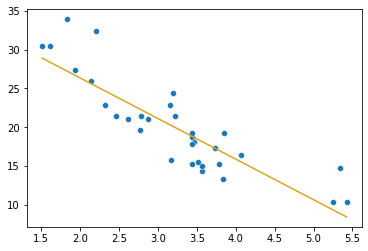

In [11]:
sns.scatterplot(x = x_list, y = y_list)
sns.lineplot(x = x_list, y = y_pred.reshape(-1), color='goldenrod')

In [12]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
X_sklearn = X_np
y_sklearn = np.array(y_list).reshape(-1,1)
model.fit(X_sklearn,y_sklearn)
print(f'Sklearn Weight: {model.coef_[0][0]}, Bias: {model.intercept_[0]}')


Sklearn Weight: -5.344471454620361, Bias: 37.285125732421875


# MODEL


In [15]:
class LinearRegressionTorch(nn.Module):
    def __init__(self,iput_size,output_size):
        super(LinearRegressionTorch,self).__init__()
        self.linear = nn.Linear(iput_size,output_size)
